In [3]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

In [5]:
def lnpdf(x, mu, icov):
    diff = x - mu
    return -np.dot(diff, np.dot(icov, diff))/2
        # numpy中的二维数组与一维数组进行矩阵乘法时的灵活处理

In [6]:
ndim = 50
mu = np.random.rand(ndim)

# 首先构造对称矩阵
cov = np.random.rand(ndim**2).reshape((ndim, ndim))-.5
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

# 协方差矩阵的逆
icov = np.linalg.inv(cov)


In [7]:

nwalkers = 250
nsteps = 1000
p0 = np.random.rand(nwalkers*ndim).reshape((nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnpdf, args=(mu, icov))
sampler.run_mcmc(p0, nsteps)

(array([[-2.61934875, -0.13377559, -1.40357971, ..., -0.38364568,
          2.01728575, -0.22343428],
        [ 1.53806357, -0.74533362,  2.14521887, ...,  1.98315127,
          2.157457  , -0.90270572],
        [ 1.76069259,  2.59772268,  1.68411774, ...,  0.87308556,
          1.29975975,  3.36438537],
        ..., 
        [ 0.02758669, -2.32738988, -3.78870781, ..., -2.04590729,
          2.07744049,  2.93013766],
        [ 0.24093942,  0.70076255,  0.2039124 , ...,  2.16234139,
         -0.0229424 ,  0.83487525],
        [ 5.15299643,  2.69867879,  1.88688779, ...,  3.14238072,
          2.59074982,  1.96945884]]),
 array([-23.42572371, -18.70297141, -25.05504432, -15.23722035,
        -32.72979155, -19.11471508, -18.51302409, -21.19838364,
        -20.84763262, -27.03475751, -20.42094268, -16.77605844,
        -25.06626703, -22.25058377, -24.50635613, -24.97272822,
        -26.02601116, -26.28698855, -29.40499968, -19.98241809,
        -23.52778511, -24.95918792, -28.89052338, -1

In [8]:
samples = sampler.chain  
        # samples表示采样数据
        # shape = (nwakers, nsteps, ndim)
samples = sampler.chain.reshape((-1, ndim))
        # 等价于 sampler.flatchain


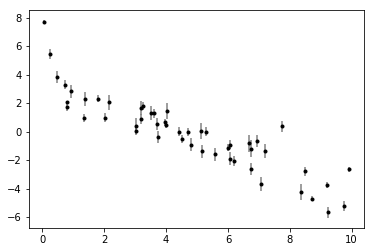

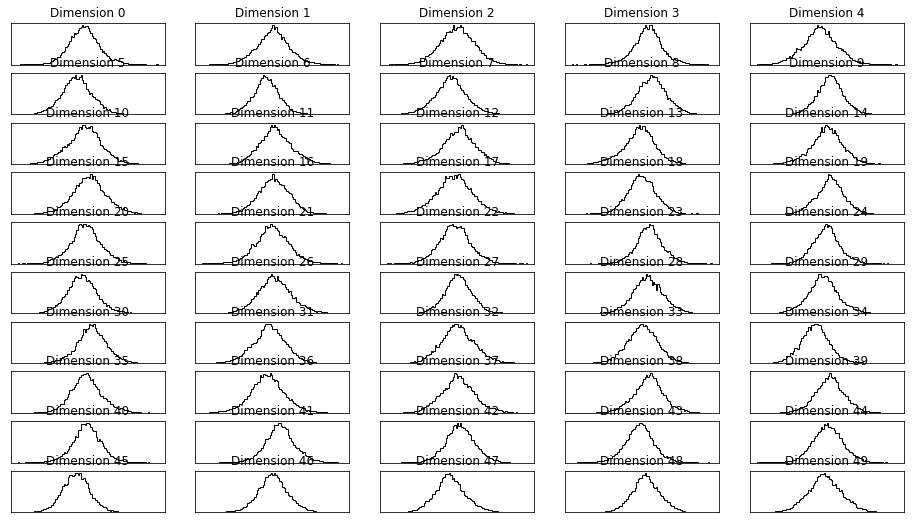

In [9]:
plt.figure(figsize=(16,9))
for i in range(ndim): 
    plt.subplot(ndim//5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    plt.title("Dimension {0:d}".format(i))
plt.show()

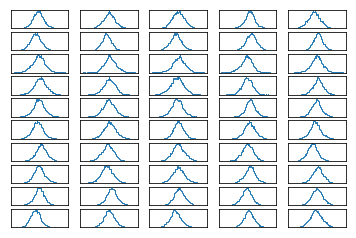

In [10]:
plt.figure(facecolor='w', edgecolor='k')
for i in range(ndim):
    plt.subplot(ndim//5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.hist(sampler.flatchain[:, i], 100, histtype='step')
plt.show()


In [11]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.194


In [12]:
def lnprob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
sampler.run_mcmc(p0, 1000)
sampler.flatchain[:,0].shape

(100000,)

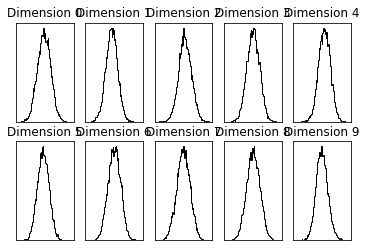

In [30]:
import matplotlib.pyplot as pl
pl.figure()
for i in range(ndim):
    plt.subplot(ndim//5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()

In [13]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))


Mean acceptance fraction: 0.418


#This number should be between approximately 0.25 and 0.5 if everything went as planned.

In [14]:
import numpy as np

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))
print(b_ls, m_ls)

3.84175181137 -0.866097474316


In [15]:
plt.errorbar(x, y, yerr, fmt='.k', ecolor='gray')
plt.plot(x,m_ml*x+b_ml)
plt.show()

NameError: name 'm_ml' is not defined

In [16]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [17]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

print(m_ml, b_ml, lnf_ml)

-0.860144150176 3.89878393656 -0.549409010825


In [18]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

In [19]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [20]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, 500)

samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [26]:
samples.shape

(45000, 3)

In [24]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])
fig.savefig("triangle1.png")
#fig.show()

In [23]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode'

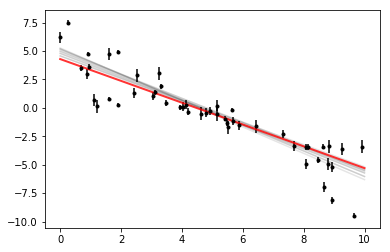

In [77]:
import matplotlib.pyplot as plt
xl = np.array([0, 10])
for m, b, lnf in samples[np.random.randint(len(samples), size=10)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k")
plt.show()

In [78]:
samples[:, 2] = np.exp(samples[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [79]:
m_mcmc, b_mcmc, f_mcmc 

((-1.0432770899095289, 0.061335045452574288, 0.060654330811410473),
 (4.867364653004489, 0.32542087738988545, 0.31830280146050072),
 (4.2459519525372116, 0.39071739832880859, 0.29017215207774694))

In [11]:
import numpy as np
v_c=6000*10**6#Hz
v_bandwidth=1500*10**6
t_delta=0.5#s
n=0.6#antenna efficiency
D=65#m
A=np.pi*D**2/4
Tsys=20#K
k=1.38*10**(-23)
dominator=A*n*(t_delta*v_bandwidth)**0.5
Smin=2*k*Tsys/dominator

In [13]:
Smin*10**26

0.001012373109551609

In [18]:
DPFU=A*n/2/k#Degree per flux unit;sensitivity
print(DPFU/10**26)
SEFD=Tsys/DPFU#source equivalent flux density
print(SEFD)

0.721371139207439
2.772497943565324e-25


In [16]:
491*0.6/2760


0.1067391304347826

In [19]:
0.95/21/0.52

0.08699633699633699